In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
final = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

In [3]:
train = train.drop(['id','EC3','EC4','EC5','EC6'], axis=1)
train.head()

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2
0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,11.938294,...,0.000000,0.000000,17.744066,0.000000,4.794537,35.527357,0,0,1,1
1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,0.000000,...,0.000000,0.000000,7.822697,30.705892,13.825658,44.707310,0,0,0,1
2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,6.606882,...,53.378235,0.000000,15.645394,73.143616,17.964475,45.660120,0,0,1,1
3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,0.000000,...,0.000000,6.420822,15.645394,62.107304,31.961948,87.509997,0,0,1,1
4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,12.841643,...,19.386400,0.000000,11.938611,18.883484,9.589074,33.333333,2,2,1,0


In [4]:
train.dtypes

BertzCT              float64
Chi1                 float64
Chi1n                float64
Chi1v                float64
Chi2n                float64
Chi2v                float64
Chi3v                float64
Chi4n                float64
EState_VSA1          float64
EState_VSA2          float64
ExactMolWt           float64
FpDensityMorgan1     float64
FpDensityMorgan2     float64
FpDensityMorgan3     float64
HallKierAlpha        float64
HeavyAtomMolWt       float64
Kappa3               float64
MaxAbsEStateIndex    float64
MinEStateIndex       float64
NumHeteroatoms         int64
PEOE_VSA10           float64
PEOE_VSA14           float64
PEOE_VSA6            float64
PEOE_VSA7            float64
PEOE_VSA8            float64
SMR_VSA10            float64
SMR_VSA5             float64
SlogP_VSA3           float64
VSA_EState9          float64
fr_COO                 int64
fr_COO2                int64
EC1                    int64
EC2                    int64
dtype: object

In [5]:
# Handle duplicates
duplicate_rows_data = train[train.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_data.shape)

Number of duplicate rows:  (0, 33)


In [6]:
# Loop through each column and count the number of distinct values
for column in train.columns:
    num_distinct_values = len(train[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

BertzCT: 2368 distinct values
Chi1: 1259 distinct values
Chi1n: 3157 distinct values
Chi1v: 3306 distinct values
Chi2n: 3634 distinct values
Chi2v: 3725 distinct values
Chi3v: 3448 distinct values
Chi4n: 2930 distinct values
EState_VSA1: 719 distinct values
EState_VSA2: 445 distinct values
ExactMolWt: 1666 distinct values
FpDensityMorgan1: 556 distinct values
FpDensityMorgan2: 650 distinct values
FpDensityMorgan3: 654 distinct values
HallKierAlpha: 388 distinct values
HeavyAtomMolWt: 860 distinct values
Kappa3: 2245 distinct values
MaxAbsEStateIndex: 2356 distinct values
MinEStateIndex: 2142 distinct values
NumHeteroatoms: 40 distinct values
PEOE_VSA10: 250 distinct values
PEOE_VSA14: 291 distinct values
PEOE_VSA6: 219 distinct values
PEOE_VSA7: 262 distinct values
PEOE_VSA8: 237 distinct values
SMR_VSA10: 409 distinct values
SMR_VSA5: 492 distinct values
SlogP_VSA3: 217 distinct values
VSA_EState9: 1946 distinct values
fr_COO: 8 distinct values
fr_COO2: 8 distinct values
EC1: 2 distin

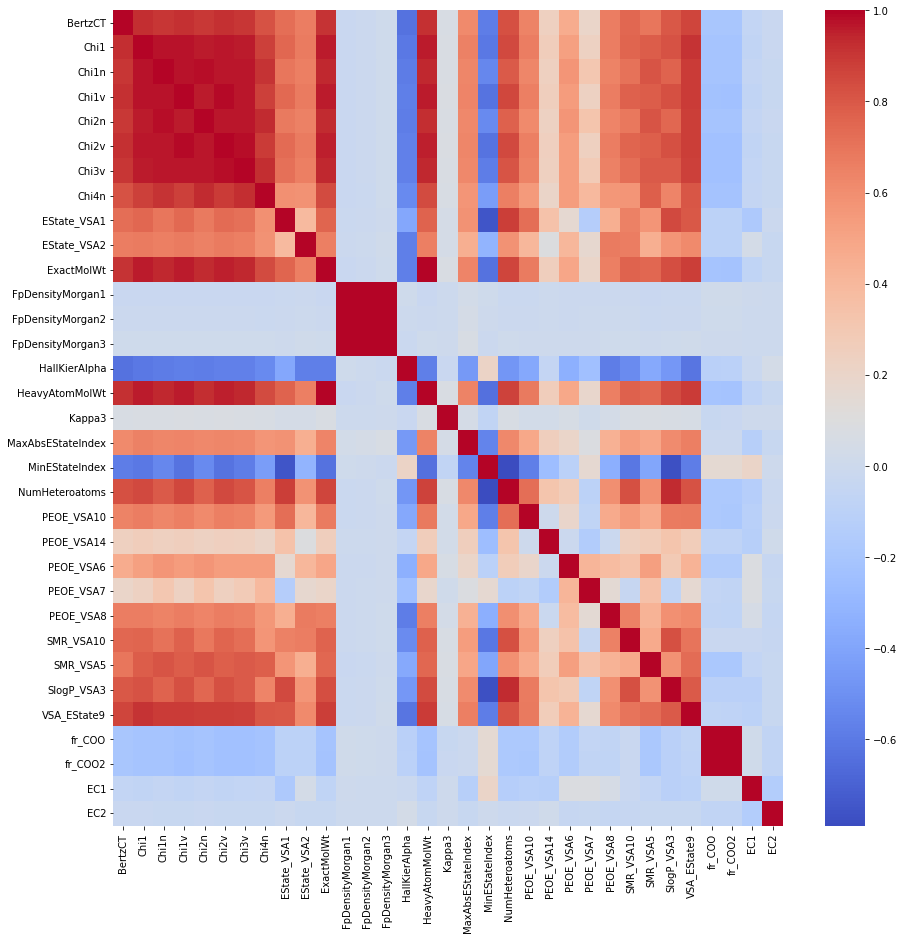

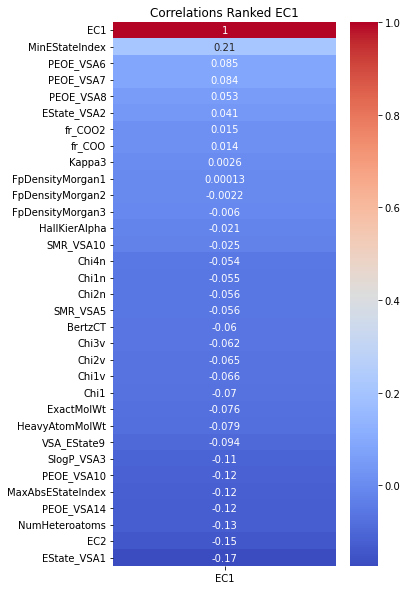

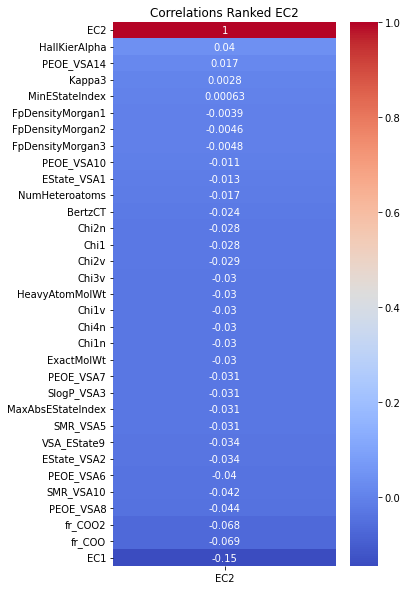

In [7]:
plt.figure(figsize = (15,15))
sns.heatmap(train.corr(), annot=False, cmap="coolwarm")
plt.show()

plt.figure(figsize = (5,10))
sns.heatmap(train.corr()[['EC1']].sort_values(by='EC1', ascending=False), annot = True, cmap="coolwarm")
plt.title('Correlations Ranked EC1')
plt.show()

plt.figure(figsize = (5,10))
sns.heatmap(train.corr()[['EC2']].sort_values(by='EC2', ascending=False), annot = True, cmap="coolwarm")
plt.title('Correlations Ranked EC2')
plt.show()

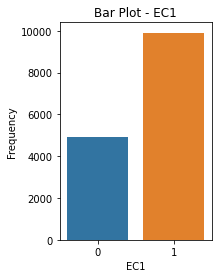

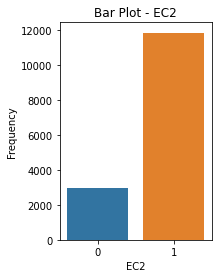

In [8]:
plt.subplot(1, 2, 1)
sns.countplot(data=train, x="EC1")
plt.xlabel("EC1")
plt.ylabel("Frequency")
plt.title("Bar Plot - EC1")
plt.show()

plt.subplot(1, 2, 2)
sns.countplot(data=train, x="EC2")
plt.xlabel("EC2")
plt.ylabel("Frequency")
plt.title("Bar Plot - EC2")
plt.show()

In [9]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
# See https://www.kaggle.com/competitions/playground-series-s3e18/discussion/419646 for feature knowledge

y = train[['EC1', 'EC2']]
X = train.drop(['EC1','EC2'], axis=1)
X = X.drop_duplicates()

def feat_engineering(X):
    X['MolWt'] = X['HeavyAtomMolWt'] + X['ExactMolWt']
    X['EState_VSA'] = X['EState_VSA1'] + X['EState_VSA2']
    X=X.drop(['fr_COO2', 'FpDensityMorgan2', 'FpDensityMorgan3', 'HeavyAtomMolWt', 'ExactMolWt',
             'EState_VSA1', 'EState_VSA2', 'Chi1v', 'Chi1n', 'Chi2n', 'Chi2v', 'Chi3v', 'Chi4n'], axis=1)

    scaler = preprocessing.StandardScaler()
    X_scaled = scaler.fit_transform(X.values)
    
    pca = PCA(n_components=10)
    pca_df = pca.fit_transform(X_scaled)

    for i in range(pca_df.shape[1]):
        X[f'PC{i+1}'] = pca_df[:, i]
        
    X_scaled = scaler.fit_transform(X.values)
    X = pd.DataFrame(X_scaled, columns=X.columns)
    
    return X

X = feat_engineering(X)
X.head()

,BertzCT,Chi1,FpDensityMorgan1,HallKierAlpha,Kappa3,MaxAbsEStateIndex,MinEStateIndex,NumHeteroatoms,PEOE_VSA10,PEOE_VSA14,...,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.353520,0.109202,-0.010008,1.034742,0.050201,0.876085,1.108894,-0.599739,-0.789601,2.133838,...,-0.460420,-0.665865,1.167686,-1.462554,0.385465,-0.430514,-0.863016,-1.239409,-0.425489,1.291877
1,-0.445083,-0.275105,0.019920,1.195122,-0.058451,0.241070,-1.311822,0.185241,0.959575,-0.288402,...,-0.061528,-1.067698,0.860353,0.956749,-0.466199,0.008210,1.382912,0.527236,-0.242646,0.302818
2,0.011965,0.260436,-0.027510,0.457377,0.200301,0.437129,-1.425939,0.054411,-0.789601,-0.062054,...,0.149866,0.598643,1.318361,-0.426832,-0.043740,-0.100448,1.923835,-0.208118,-2.189200,-1.756490
3,0.096375,0.486550,-0.013473,-0.098605,0.018586,0.394238,-1.527723,1.362710,2.271458,0.102577,...,1.002499,-1.173095,0.556560,0.991950,-0.369786,-0.004234,1.449566,0.165500,1.484683,-0.374789
4,-0.741804,-0.692175,0.037820,0.115234,-0.042492,-0.449376,0.214619,-0.599739,-0.356758,-0.169309,...,-0.566852,0.074243,-1.375438,-0.989045,0.459291,0.097985,0.757347,1.374544,-0.013985,-0.718855


In [10]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

def get_model(n_input, n_output):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape= [n_input]),
        layers.Dense(n_output, activation='sigmoid'),
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.00001),
        loss='binary_crossentropy',
        metrics=['AUC'],
    )
    
    return model


In [11]:
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_auc_score

# evaluate a model using repeated k-fold cross-validation
aucs = list()
n_input, n_output = X.shape[1], y.shape[1]

cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
# enumerate folds
for train_ix, test_ix in cv.split(X):
    # prepare data
    X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
    # define model
    model = get_model(n_input, n_output)
    # fit model
    early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
    model.fit(X_train, y_train, validation_data=(X_test, y_test), 
              verbose=1, batch_size=64, epochs=20, callbacks=[early_stopping])
    
    # make a prediction on the test set
    yhat = model.predict(X_test)
    # auc, store results
    auc1 = roc_auc_score(y_test['EC1'], yhat[:, 0])
    auc2 = roc_auc_score(y_test['EC2'], yhat[:, 1])
    aucs.append((auc1, auc2))

mean_auc1 = sum([auc[0] for auc in aucs]) / len(aucs)
mean_auc2 = sum([auc[1] for auc in aucs]) / len(aucs)
print(mean_auc1)
print(mean_auc2)

Epoch 1/20
209/209 [==============================] - 1s 1ms/step - loss: 0.8014 - auc: 0.4055 - val_loss: 0.7936 - val_auc: 0.3865
Epoch 2/20
209/209 [==============================] - 0s 573us/step - loss: 0.7779 - auc: 0.4087 - val_loss: 0.7708 - val_auc: 0.3890
Epoch 3/20
209/209 [==============================] - 0s 575us/step - loss: 0.7567 - auc: 0.4127 - val_loss: 0.7501 - val_auc: 0.3930
Epoch 4/20
209/209 [==============================] - 0s 571us/step - loss: 0.7374 - auc: 0.4176 - val_loss: 0.7311 - val_auc: 0.3983
Epoch 5/20
209/209 [==============================] - 0s 580us/step - loss: 0.7199 - auc: 0.4241 - val_loss: 0.7140 - val_auc: 0.4058
Epoch 6/20
209/209 [==============================] - 0s 572us/step - loss: 0.7039 - auc: 0.4325 - val_loss: 0.6982 - val_auc: 0.4147
Epoch 7/20
209/209 [==============================] - 0s 580us/step - loss: 0.6893 - auc: 0.4420 - val_loss: 0.6839 - val_auc: 0.4256
Epoch 8/20
209/209 [==============================] - 0s 568us/s

Epoch 2/20
209/209 [==============================] - 0s 556us/step - loss: 0.6403 - auc: 0.5341 - val_loss: 0.6348 - val_auc: 0.5539
Epoch 3/20
209/209 [==============================] - 0s 585us/step - loss: 0.6292 - auc: 0.5478 - val_loss: 0.6250 - val_auc: 0.5665
Epoch 4/20
209/209 [==============================] - 0s 556us/step - loss: 0.6195 - auc: 0.5602 - val_loss: 0.6162 - val_auc: 0.5775
Epoch 5/20
209/209 [==============================] - 0s 566us/step - loss: 0.6110 - auc: 0.5708 - val_loss: 0.6086 - val_auc: 0.5874
Epoch 6/20
209/209 [==============================] - 0s 585us/step - loss: 0.6035 - auc: 0.5799 - val_loss: 0.6019 - val_auc: 0.5953
Epoch 7/20
209/209 [==============================] - 0s 568us/step - loss: 0.5970 - auc: 0.5876 - val_loss: 0.5961 - val_auc: 0.6019
Epoch 8/20
209/209 [==============================] - 0s 561us/step - loss: 0.5912 - auc: 0.5940 - val_loss: 0.5908 - val_auc: 0.6079
Epoch 9/20
209/209 [==============================] - 0s 567us

Epoch 3/20
209/209 [==============================] - 0s 579us/step - loss: 0.7276 - auc: 0.5118 - val_loss: 0.7205 - val_auc: 0.5269
Epoch 4/20
209/209 [==============================] - 0s 583us/step - loss: 0.7112 - auc: 0.5219 - val_loss: 0.7054 - val_auc: 0.5344
Epoch 5/20
209/209 [==============================] - 0s 561us/step - loss: 0.6961 - auc: 0.5320 - val_loss: 0.6916 - val_auc: 0.5416
Epoch 6/20
209/209 [==============================] - 0s 567us/step - loss: 0.6823 - auc: 0.5421 - val_loss: 0.6789 - val_auc: 0.5488
Epoch 7/20
209/209 [==============================] - 0s 564us/step - loss: 0.6697 - auc: 0.5517 - val_loss: 0.6675 - val_auc: 0.5560
Epoch 8/20
209/209 [==============================] - 0s 566us/step - loss: 0.6580 - auc: 0.5618 - val_loss: 0.6569 - val_auc: 0.5623
Epoch 9/20
209/209 [==============================] - 0s 561us/step - loss: 0.6474 - auc: 0.5706 - val_loss: 0.6472 - val_auc: 0.5687
Epoch 10/20
209/209 [==============================] - 0s 566u

Epoch 4/20
209/209 [==============================] - 0s 580us/step - loss: 0.7320 - auc: 0.5246 - val_loss: 0.7132 - val_auc: 0.5379
Epoch 5/20
209/209 [==============================] - 0s 580us/step - loss: 0.7131 - auc: 0.5338 - val_loss: 0.6961 - val_auc: 0.5465
Epoch 6/20
209/209 [==============================] - 0s 566us/step - loss: 0.6959 - auc: 0.5434 - val_loss: 0.6804 - val_auc: 0.5549
Epoch 7/20
209/209 [==============================] - 0s 571us/step - loss: 0.6801 - auc: 0.5527 - val_loss: 0.6662 - val_auc: 0.5634
Epoch 8/20
209/209 [==============================] - 0s 580us/step - loss: 0.6658 - auc: 0.5613 - val_loss: 0.6533 - val_auc: 0.5718
Epoch 9/20
209/209 [==============================] - 0s 580us/step - loss: 0.6527 - auc: 0.5700 - val_loss: 0.6416 - val_auc: 0.5794
Epoch 10/20
209/209 [==============================] - 0s 583us/step - loss: 0.6408 - auc: 0.5777 - val_loss: 0.6310 - val_auc: 0.5863
Epoch 11/20
209/209 [==============================] - 0s 580

Epoch 5/20
209/209 [==============================] - 0s 599us/step - loss: 0.7055 - auc: 0.5014 - val_loss: 0.6906 - val_auc: 0.5081
Epoch 6/20
209/209 [==============================] - 0s 580us/step - loss: 0.6893 - auc: 0.5160 - val_loss: 0.6760 - val_auc: 0.5224
Epoch 7/20
209/209 [==============================] - 0s 580us/step - loss: 0.6748 - auc: 0.5302 - val_loss: 0.6628 - val_auc: 0.5359
Epoch 8/20
209/209 [==============================] - 0s 578us/step - loss: 0.6617 - auc: 0.5434 - val_loss: 0.6510 - val_auc: 0.5482
Epoch 9/20
209/209 [==============================] - 0s 580us/step - loss: 0.6499 - auc: 0.5552 - val_loss: 0.6403 - val_auc: 0.5589
Epoch 10/20
209/209 [==============================] - 0s 585us/step - loss: 0.6394 - auc: 0.5650 - val_loss: 0.6306 - val_auc: 0.5685
Epoch 11/20
209/209 [==============================] - 0s 588us/step - loss: 0.6299 - auc: 0.5744 - val_loss: 0.6220 - val_auc: 0.5767
Epoch 12/20
209/209 [==============================] - 0s 58

Epoch 6/20
209/209 [==============================] - 0s 585us/step - loss: 0.6548 - auc: 0.5031 - val_loss: 0.6413 - val_auc: 0.5239
Epoch 7/20
209/209 [==============================] - 0s 590us/step - loss: 0.6431 - auc: 0.5119 - val_loss: 0.6305 - val_auc: 0.5325
Epoch 8/20
209/209 [==============================] - 0s 583us/step - loss: 0.6328 - auc: 0.5218 - val_loss: 0.6210 - val_auc: 0.5411
Epoch 9/20
209/209 [==============================] - 0s 580us/step - loss: 0.6237 - auc: 0.5309 - val_loss: 0.6127 - val_auc: 0.5500
Epoch 10/20
209/209 [==============================] - 0s 585us/step - loss: 0.6157 - auc: 0.5406 - val_loss: 0.6053 - val_auc: 0.5587
Epoch 11/20
209/209 [==============================] - 0s 585us/step - loss: 0.6086 - auc: 0.5498 - val_loss: 0.5987 - val_auc: 0.5671
Epoch 12/20
209/209 [==============================] - 0s 590us/step - loss: 0.6023 - auc: 0.5590 - val_loss: 0.5929 - val_auc: 0.5755
Epoch 13/20
209/209 [==============================] - 0s 5

209/209 [==============================] - 0s 574us/step - loss: 0.6399 - auc: 0.5449 - val_loss: 0.6332 - val_auc: 0.5409
Epoch 7/20
209/209 [==============================] - 0s 575us/step - loss: 0.6288 - auc: 0.5562 - val_loss: 0.6229 - val_auc: 0.5523
Epoch 8/20
209/209 [==============================] - 0s 585us/step - loss: 0.6189 - auc: 0.5660 - val_loss: 0.6139 - val_auc: 0.5631
Epoch 9/20
209/209 [==============================] - 0s 571us/step - loss: 0.6102 - auc: 0.5752 - val_loss: 0.6058 - val_auc: 0.5723
Epoch 10/20
209/209 [==============================] - 0s 575us/step - loss: 0.6024 - auc: 0.5833 - val_loss: 0.5987 - val_auc: 0.5816
Epoch 11/20
209/209 [==============================] - 0s 585us/step - loss: 0.5956 - auc: 0.5908 - val_loss: 0.5924 - val_auc: 0.5892
Epoch 12/20
209/209 [==============================] - 0s 575us/step - loss: 0.5895 - auc: 0.5971 - val_loss: 0.5868 - val_auc: 0.5964
Epoch 13/20
209/209 [==============================] - 0s 580us/step -

209/209 [==============================] - 0s 580us/step - loss: 0.6306 - auc: 0.5607 - val_loss: 0.6220 - val_auc: 0.5695
Epoch 8/20
209/209 [==============================] - 0s 571us/step - loss: 0.6225 - auc: 0.5684 - val_loss: 0.6141 - val_auc: 0.5771
Epoch 9/20
209/209 [==============================] - 0s 585us/step - loss: 0.6152 - auc: 0.5758 - val_loss: 0.6069 - val_auc: 0.5840
Epoch 10/20
209/209 [==============================] - 0s 580us/step - loss: 0.6086 - auc: 0.5829 - val_loss: 0.6004 - val_auc: 0.5903
Epoch 11/20
209/209 [==============================] - 0s 585us/step - loss: 0.6026 - auc: 0.5894 - val_loss: 0.5946 - val_auc: 0.5955
Epoch 12/20
209/209 [==============================] - 0s 569us/step - loss: 0.5972 - auc: 0.5954 - val_loss: 0.5893 - val_auc: 0.6008
Epoch 13/20
209/209 [==============================] - 0s 584us/step - loss: 0.5923 - auc: 0.6011 - val_loss: 0.5845 - val_auc: 0.6046
Epoch 14/20
209/209 [==============================] - 0s 580us/step 

209/209 [==============================] - 0s 585us/step - loss: 0.6117 - auc: 0.5805 - val_loss: 0.6172 - val_auc: 0.5859
Epoch 9/20
209/209 [==============================] - 0s 580us/step - loss: 0.6049 - auc: 0.5862 - val_loss: 0.6107 - val_auc: 0.5915
Epoch 10/20
209/209 [==============================] - 0s 575us/step - loss: 0.5987 - auc: 0.5913 - val_loss: 0.6050 - val_auc: 0.5975
Epoch 11/20
209/209 [==============================] - 0s 566us/step - loss: 0.5931 - auc: 0.5961 - val_loss: 0.5998 - val_auc: 0.6024
Epoch 12/20
209/209 [==============================] - 0s 571us/step - loss: 0.5880 - auc: 0.6007 - val_loss: 0.5950 - val_auc: 0.6072
Epoch 13/20
209/209 [==============================] - 0s 575us/step - loss: 0.5834 - auc: 0.6047 - val_loss: 0.5909 - val_auc: 0.6119
Epoch 14/20
209/209 [==============================] - 0s 573us/step - loss: 0.5792 - auc: 0.6087 - val_loss: 0.5871 - val_auc: 0.6153
Epoch 15/20
209/209 [==============================] - 0s 568us/step

209/209 [==============================] - 0s 579us/step - loss: 0.6568 - auc: 0.5219 - val_loss: 0.6578 - val_auc: 0.5085
Epoch 10/20
209/209 [==============================] - 0s 575us/step - loss: 0.6469 - auc: 0.5311 - val_loss: 0.6480 - val_auc: 0.5175
Epoch 11/20
209/209 [==============================] - 0s 571us/step - loss: 0.6378 - auc: 0.5404 - val_loss: 0.6388 - val_auc: 0.5268
Epoch 12/20
209/209 [==============================] - 0s 580us/step - loss: 0.6294 - auc: 0.5494 - val_loss: 0.6304 - val_auc: 0.5361
Epoch 13/20
209/209 [==============================] - 0s 580us/step - loss: 0.6217 - auc: 0.5577 - val_loss: 0.6226 - val_auc: 0.5448
Epoch 14/20
209/209 [==============================] - 0s 580us/step - loss: 0.6147 - auc: 0.5656 - val_loss: 0.6154 - val_auc: 0.5525
Epoch 15/20
209/209 [==============================] - 0s 571us/step - loss: 0.6082 - auc: 0.5730 - val_loss: 0.6087 - val_auc: 0.5595
Epoch 16/20
209/209 [==============================] - 0s 575us/ste

209/209 [==============================] - 0s 580us/step - loss: 0.6474 - auc: 0.4890 - val_loss: 0.6454 - val_auc: 0.4788
Epoch 11/20
209/209 [==============================] - 0s 580us/step - loss: 0.6388 - auc: 0.4998 - val_loss: 0.6375 - val_auc: 0.4866
Epoch 12/20
209/209 [==============================] - 0s 585us/step - loss: 0.6308 - auc: 0.5104 - val_loss: 0.6303 - val_auc: 0.4936
Epoch 13/20
209/209 [==============================] - 0s 580us/step - loss: 0.6236 - auc: 0.5206 - val_loss: 0.6238 - val_auc: 0.5007
Epoch 14/20
209/209 [==============================] - 0s 585us/step - loss: 0.6170 - auc: 0.5302 - val_loss: 0.6178 - val_auc: 0.5077
Epoch 15/20
209/209 [==============================] - 0s 583us/step - loss: 0.6109 - auc: 0.5394 - val_loss: 0.6123 - val_auc: 0.5137
Epoch 16/20
209/209 [==============================] - 0s 574us/step - loss: 0.6054 - auc: 0.5479 - val_loss: 0.6074 - val_auc: 0.5195
Epoch 17/20
209/209 [==============================] - 0s 575us/ste

209/209 [==============================] - 0s 574us/step - loss: 0.6447 - auc: 0.5973 - val_loss: 0.6355 - val_auc: 0.6149
Epoch 12/20
209/209 [==============================] - 0s 571us/step - loss: 0.6344 - auc: 0.6008 - val_loss: 0.6244 - val_auc: 0.6187
Epoch 13/20
209/209 [==============================] - 0s 571us/step - loss: 0.6252 - auc: 0.6042 - val_loss: 0.6144 - val_auc: 0.6230
Epoch 14/20
209/209 [==============================] - 0s 571us/step - loss: 0.6170 - auc: 0.6068 - val_loss: 0.6054 - val_auc: 0.6265
Epoch 15/20
209/209 [==============================] - 0s 575us/step - loss: 0.6097 - auc: 0.6100 - val_loss: 0.5972 - val_auc: 0.6297
Epoch 16/20
209/209 [==============================] - 0s 582us/step - loss: 0.6031 - auc: 0.6129 - val_loss: 0.5900 - val_auc: 0.6329
Epoch 17/20
209/209 [==============================] - 0s 575us/step - loss: 0.5973 - auc: 0.6155 - val_loss: 0.5834 - val_auc: 0.6360
Epoch 18/20
209/209 [==============================] - 0s 573us/ste

209/209 [==============================] - 0s 590us/step - loss: 0.6249 - auc: 0.5407 - val_loss: 0.6323 - val_auc: 0.5303
Epoch 13/20
209/209 [==============================] - 0s 585us/step - loss: 0.6165 - auc: 0.5508 - val_loss: 0.6251 - val_auc: 0.5406
Epoch 14/20
209/209 [==============================] - 0s 580us/step - loss: 0.6090 - auc: 0.5610 - val_loss: 0.6187 - val_auc: 0.5512
Epoch 15/20
209/209 [==============================] - 0s 592us/step - loss: 0.6022 - auc: 0.5708 - val_loss: 0.6129 - val_auc: 0.5605
Epoch 16/20
209/209 [==============================] - 0s 588us/step - loss: 0.5960 - auc: 0.5800 - val_loss: 0.6077 - val_auc: 0.5693
Epoch 17/20
209/209 [==============================] - 0s 595us/step - loss: 0.5904 - auc: 0.5886 - val_loss: 0.6030 - val_auc: 0.5775
Epoch 18/20
209/209 [==============================] - 0s 590us/step - loss: 0.5854 - auc: 0.5962 - val_loss: 0.5988 - val_auc: 0.5841
Epoch 19/20
209/209 [==============================] - 0s 589us/ste

209/209 [==============================] - 0s 585us/step - loss: 0.6238 - auc: 0.5118 - val_loss: 0.6286 - val_auc: 0.5032
Epoch 14/20
209/209 [==============================] - 0s 585us/step - loss: 0.6165 - auc: 0.5249 - val_loss: 0.6210 - val_auc: 0.5180
Epoch 15/20
209/209 [==============================] - 0s 579us/step - loss: 0.6099 - auc: 0.5377 - val_loss: 0.6140 - val_auc: 0.5322
Epoch 16/20
209/209 [==============================] - 0s 575us/step - loss: 0.6039 - auc: 0.5493 - val_loss: 0.6075 - val_auc: 0.5463
Epoch 17/20
209/209 [==============================] - 0s 575us/step - loss: 0.5985 - auc: 0.5598 - val_loss: 0.6017 - val_auc: 0.5578
Epoch 18/20
209/209 [==============================] - 0s 585us/step - loss: 0.5935 - auc: 0.5696 - val_loss: 0.5962 - val_auc: 0.5693
Epoch 19/20
209/209 [==============================] - 0s 580us/step - loss: 0.5890 - auc: 0.5785 - val_loss: 0.5913 - val_auc: 0.5790
Epoch 20/20
209/209 [==============================] - 0s 580us/ste

209/209 [==============================] - 0s 575us/step - loss: 0.5673 - auc: 0.6181 - val_loss: 0.5654 - val_auc: 0.6171
Epoch 15/20
209/209 [==============================] - 0s 580us/step - loss: 0.5652 - auc: 0.6219 - val_loss: 0.5633 - val_auc: 0.6205
Epoch 16/20
209/209 [==============================] - 0s 585us/step - loss: 0.5633 - auc: 0.6255 - val_loss: 0.5615 - val_auc: 0.6230
Epoch 17/20
209/209 [==============================] - 0s 580us/step - loss: 0.5615 - auc: 0.6283 - val_loss: 0.5598 - val_auc: 0.6255
Epoch 18/20
209/209 [==============================] - 0s 571us/step - loss: 0.5600 - auc: 0.6311 - val_loss: 0.5583 - val_auc: 0.6278
Epoch 19/20
209/209 [==============================] - 0s 573us/step - loss: 0.5586 - auc: 0.6333 - val_loss: 0.5570 - val_auc: 0.6293
Epoch 20/20
209/209 [==============================] - 0s 569us/step - loss: 0.5574 - auc: 0.6354 - val_loss: 0.5558 - val_auc: 0.6313
Epoch 1/20
209/209 [==============================] - 1s 1ms/step -

209/209 [==============================] - 0s 574us/step - loss: 0.5823 - auc: 0.6042 - val_loss: 0.5600 - val_auc: 0.6432
Epoch 16/20
209/209 [==============================] - 0s 572us/step - loss: 0.5786 - auc: 0.6078 - val_loss: 0.5560 - val_auc: 0.6470
Epoch 17/20
209/209 [==============================] - 0s 575us/step - loss: 0.5753 - auc: 0.6107 - val_loss: 0.5523 - val_auc: 0.6505
Epoch 18/20
209/209 [==============================] - 0s 568us/step - loss: 0.5724 - auc: 0.6136 - val_loss: 0.5490 - val_auc: 0.6530
Epoch 19/20
209/209 [==============================] - 0s 568us/step - loss: 0.5698 - auc: 0.6162 - val_loss: 0.5460 - val_auc: 0.6556
Epoch 20/20
209/209 [==============================] - 0s 569us/step - loss: 0.5675 - auc: 0.6188 - val_loss: 0.5434 - val_auc: 0.6585
Epoch 1/20
209/209 [==============================] - 1s 1ms/step - loss: 0.8072 - auc: 0.4554 - val_loss: 0.7803 - val_auc: 0.4913
Epoch 2/20
209/209 [==============================] - 0s 575us/step - 

209/209 [==============================] - 0s 566us/step - loss: 0.5704 - auc: 0.6188 - val_loss: 0.5666 - val_auc: 0.6263
Epoch 17/20
209/209 [==============================] - 0s 561us/step - loss: 0.5677 - auc: 0.6233 - val_loss: 0.5640 - val_auc: 0.6298
Epoch 18/20
209/209 [==============================] - 0s 561us/step - loss: 0.5652 - auc: 0.6271 - val_loss: 0.5617 - val_auc: 0.6329
Epoch 19/20
209/209 [==============================] - 0s 561us/step - loss: 0.5630 - auc: 0.6305 - val_loss: 0.5597 - val_auc: 0.6366
Epoch 20/20
209/209 [==============================] - 0s 566us/step - loss: 0.5611 - auc: 0.6336 - val_loss: 0.5580 - val_auc: 0.6388
Epoch 1/20
209/209 [==============================] - 1s 1ms/step - loss: 0.6758 - auc: 0.4781 - val_loss: 0.6664 - val_auc: 0.4822
Epoch 2/20
209/209 [==============================] - 0s 571us/step - loss: 0.6622 - auc: 0.4907 - val_loss: 0.6538 - val_auc: 0.4945
Epoch 3/20
209/209 [==============================] - 0s 566us/step - l

In [12]:
# remove and save ids in final submission data
ids = final['id']
final = final.drop(['id'], axis=1)

final = feat_engineering(final)

final.head()

,BertzCT,Chi1,FpDensityMorgan1,HallKierAlpha,Kappa3,MaxAbsEStateIndex,MinEStateIndex,NumHeteroatoms,PEOE_VSA10,PEOE_VSA14,...,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.315597,-0.269963,0.287087,1.047290,-0.054456,-0.195033,-1.279860,-0.207598,0.523464,-0.139008,...,-0.163827,-0.998984,0.097649,-0.025954,0.143634,0.482007,1.648413,-0.464198,-0.025662,-0.332740
1,1.682891,0.230503,-1.964196,-0.653453,0.128232,0.866371,0.871779,-0.599240,-0.793477,-0.516129,...,0.189648,3.474726,-0.885389,0.331383,-0.318963,1.420777,-1.038704,-1.573505,-1.157453,-1.404798
2,-0.795626,-0.766207,0.606526,0.375659,0.003993,-0.547459,0.614435,-0.729787,-0.793477,-0.349531,...,-0.747313,-0.271275,0.674948,0.348369,0.090763,-0.337685,0.215275,0.250456,-0.340340,-0.012502
3,-0.672710,-0.472919,0.952584,0.689809,-0.048933,-0.215904,1.160526,-0.338146,-0.793477,1.156617,...,-0.644791,-0.354354,-0.892474,0.440433,-0.303788,-1.329744,-0.880818,0.015384,0.396795,0.689899
4,2.389976,2.339855,-0.621003,-1.335916,0.084170,1.326941,-1.685785,1.489516,1.814234,0.138847,...,2.344914,-0.619777,1.119799,-0.947938,0.409703,-0.980755,-0.698307,0.387136,-1.282326,-0.390614


In [13]:
# do final prediction to generate submission
predictions = model.predict(final)
predictions

array([[0.44619867, 0.5977496 ],
       [0.8529932 , 0.8634834 ],
       [0.7085229 , 0.7299312 ],
       ...,
       [0.76357394, 0.7236722 ],
       [0.7811929 , 0.73761445],
       [0.4757579 , 0.6356262 ]], dtype=float32)

In [14]:
submit = pd.DataFrame(predictions, columns = ['EC1','EC2'])

submit['id'] = ids
submit = submit[['id','EC1','EC2']]

submit.head()

,id,EC1,EC2
0,14838,0.446199,0.597750
1,14839,0.852993,0.863483
2,14840,0.708523,0.729931
3,14841,0.705199,0.814775
4,14842,0.683463,0.833336


In [15]:
print(submit.value_counts('EC1'))
print(submit.value_counts('EC2'))

EC1
0.779461    3
0.803476    2
0.742383    2
0.697656    2
0.821451    2
           ..
0.745641    1
0.745620    1
0.745591    1
0.745478    1
0.113708    1
Length: 9875, dtype: int64
EC2
0.723098    3
0.753492    3
0.832033    2
0.646452    2
0.674206    2
           ..
0.772841    1
0.772832    1
0.772828    1
0.772805    1
0.444311    1
Length: 9869, dtype: int64


In [16]:
submit.to_csv('submission6.csv', index=False)